# Лабораторная работа 8. Линейная и логистическая регрессия

In [ ]:
!pip install utils.py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for utils.py: filename=utils_py-0.3.0-py3-none-any.whl size=12321 sha256=d0799edb7081de6c9a9b2ff1724b6820d5b7ae95345802fccf83265d994c30cc
  Stored in directory: /root/.cache/pip/wheels/66/77/84/11d6808ddbebd6f12cc980cc8ec8227d63cf8eb0743a115ac0
Successfully built utils.py


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_line_or_scatter as plt_my
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('ParisHousingClass.csv')
X=df.iloc[:,:17]
y=df.iloc[:,17]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(17470, 17)
(10000, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


## Подготовка данных

In [ ]:
mapping = {"Luxury": 1, "Basic": 0}
df['category'] = df['category'].map(mapping)

from sklearn import preprocessing
X_train = df.iloc[:,:16]
X_normalized = preprocessing.normalize(X_train, norm='l2')
frame = pd.DataFrame(X_normalized, columns = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
                                              'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom'])
frame['price'] = df['price']
frame['category'] = df['category']

df = frame
df.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,0.983542,0.000039,0.000000,0.000013,0.000820,0.122065,0.000039,0.000104,0.026111,0.000000,0.000013,0.056169,0.117273,0.012450,0.000000,0.000091,7559081.5,0
1,0.897556,0.000433,0.000011,0.000011,0.001089,0.437616,0.000089,0.000067,0.022391,0.000011,0.000000,0.040593,0.027070,0.001422,0.000011,0.000022,8085989.5,1
2,0.841594,0.000876,0.000000,0.000015,0.000287,0.520513,0.000091,0.000121,0.030530,0.000000,0.000000,0.044367,0.133720,0.002039,0.000015,0.000136,5574642.1,0
3,0.745210,0.001084,0.000000,0.000000,0.000138,0.644276,0.000231,0.000092,0.046397,0.000000,0.000023,0.015197,0.164672,0.008279,0.000000,0.000069,3232561.2,0
4,0.874320,0.000236,0.000012,0.000012,0.001117,0.472298,0.000037,0.000087,0.024704,0.000012,0.000000,0.104714,0.030154,0.003625,0.000012,0.000050,7055052.0,1


In [ ]:
x_y = df[['cityPartRange', 'price']]
x_y

,cityPartRange,price
0,0.000039,7.559082e+06
1,0.000089,8.085990e+06
2,0.000091,5.574642e+06
3,0.000231,3.232561e+06
4,0.000037,7.055052e+06
...,...,...
17465,0.000086,5.255339e+06
17466,0.000061,2.991252e+06
17467,0.000067,6.667532e+06
17468,0.000107,6.489558e+06


In [ ]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind #

array([83, 21, 31, 73, 14, 33, 47, 61, 71, 15, 56, 30, 52, 16, 42, 84, 68,
       34, 55, 38, 48, 43,  1,  5, 46, 58, 82, 40, 11,  2, 86, 19, 13,  0,
       20, 98, 78,  9,  4, 74, 96,  6, 24, 53, 32, 64, 97, 99, 41, 25, 75,
       81, 93, 92, 17, 63, 36, 57, 18,  8, 90, 60, 37, 62, 51, 80, 66, 85,
       50, 91, 87, 76, 95, 28, 77, 49,  7, 65, 94, 35, 72, 23, 54, 26, 69,
        3, 39, 10, 22, 59, 27, 89, 44, 67, 88, 12, 79, 29, 45, 70])

In [ ]:
train_idx = new_ind[:70]
test_idx = new_ind[70:]

In [ ]:
x_y_train = x_y.iloc[train_idx]

<Axes: >

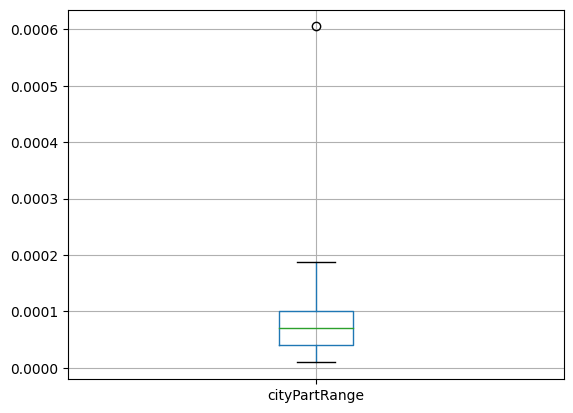

In [ ]:
x_y_train.boxplot(column=['cityPartRange'])

In [ ]:
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['cityPartRange'], x_y_train['price']# обучающие вход и желаемый выход
x_test, y_test = x_y['cityPartRange'][test_idx], x_y['price'][test_idx]# тестовые вход и желаемый выход

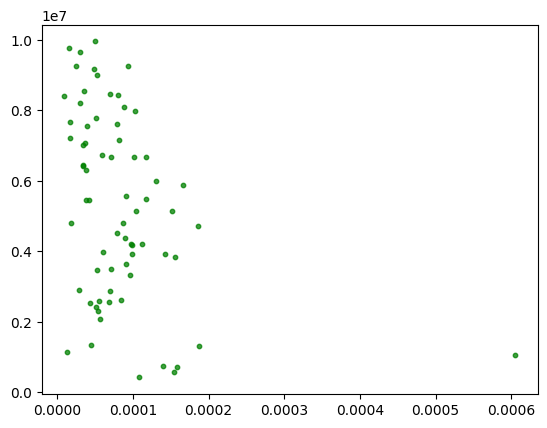

In [ ]:
plt_my('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа
#plt.scatter(x_test, y_test,  color='green')
plt.show()

## Обучение

### Гиперпараметры

In [ ]:
lr = 1e-3 # шаг обучения
epochs = 3500 # количество эпох

In [ ]:
a =  np.random.randn(1) # случайное число для параметра a
a

array([0.57270969])

In [ ]:
b = np.random.rand(1) # случайное число для параметра b
b

array([0.49192824])

In [ ]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

<ipython-input-82-30cadd65e19b>:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



ep:   0  loss: 34631183461760.558594   a=1.305  b=10537.178
ep:  20  loss: 32495191523978.714844   a=15.581  b=216901.048
ep:  40  loss: 30523580397369.335938   a=29.180  b=415165.333
ep:  60  loss: 28703699729368.203125   a=42.130  b=605647.934
ep:  80  loss: 27023872708172.066406   a=54.454  b=788654.276
ep: 100  loss: 25473321141379.066406   a=66.178  b=964477.794
ep: 120  loss: 24042096300397.140625   a=77.326  b=1133400.407
ep: 140  loss: 22721015086900.632812   a=87.920  b=1295692.969
ep: 160  loss: 21501601111763.273438   a=97.981  b=1451615.704
ep: 180  loss: 20376030308414.855469   a=107.531  b=1601418.620
ep: 200  loss: 19337080731663.574219   a=116.590  b=1745341.915
ep: 220  loss: 18378086219880.308594   a=125.177  b=1883616.359
ep: 240  loss: 17492893623230.068359   a=133.310  b=2016463.663
ep: 260  loss: 16675823323516.000000   a=141.008  b=2144096.837
ep: 280  loss: 15921632792321.447266   a=148.287  b=2266720.531
ep: 300  loss: 15225482953629.833984   a=155.164  b=23845

In [ ]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

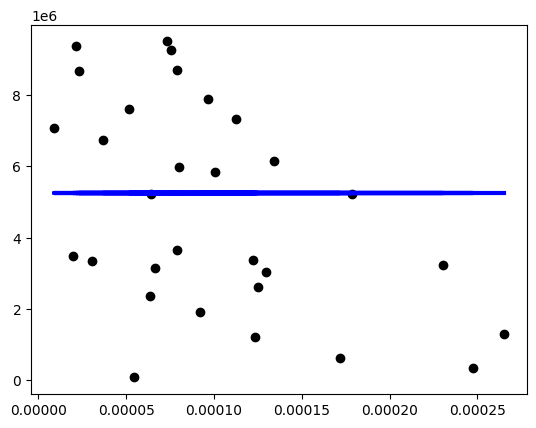

In [ ]:
# нарисуем
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

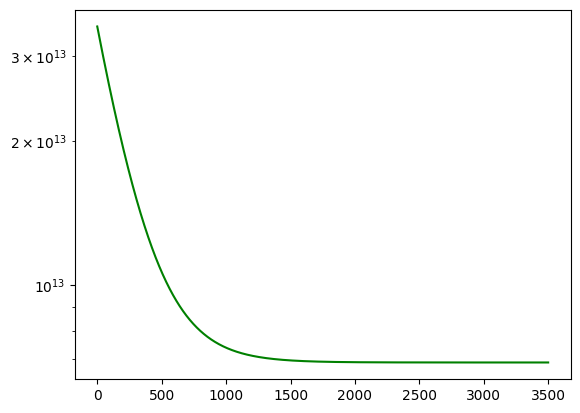

In [ ]:
# посмотрим на функцию ошибки
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

## Логистическая регрессия

In [ ]:
X=df.iloc[:,:16]
y=df.iloc[:,17]

In [ ]:
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.983542,0.000039,0.000000,0.000013,0.000820,0.122065,0.000039,0.000104,0.026111,0.000000,0.000013,0.056169,0.117273,0.012450,0.000000,0.000091
1,0.897556,0.000433,0.000011,0.000011,0.001089,0.437616,0.000089,0.000067,0.022391,0.000011,0.000000,0.040593,0.027070,0.001422,0.000011,0.000022
2,0.841594,0.000876,0.000000,0.000015,0.000287,0.520513,0.000091,0.000121,0.030530,0.000000,0.000000,0.044367,0.133720,0.002039,0.000015,0.000136
3,0.745210,0.001084,0.000000,0.000000,0.000138,0.644276,0.000231,0.000092,0.046397,0.000000,0.000023,0.015197,0.164672,0.008279,0.000000,0.000069
4,0.874320,0.000236,0.000012,0.000012,0.001117,0.472298,0.000037,0.000087,0.024704,0.000012,0.000000,0.104714,0.030154,0.003625,0.000012,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,0.902914,0.000672,0.000017,0.000017,0.001188,0.420178,0.000086,0.000069,0.034448,0.000017,0.000017,0.075062,0.036446,0.006700,0.000000,0.000086
17466,0.364232,0.000147,0.000012,0.000012,0.000733,0.930256,0.000061,0.000012,0.024539,0.000012,0.000000,0.032673,0.015976,0.005777,0.000000,0.000037
17467,0.898604,0.000675,0.000013,0.000013,0.000729,0.425705,0.000067,0.000094,0.027032,0.000013,0.000000,0.048085,0.090366,0.008732,0.000000,0.000040
17468,0.987780,0.000793,0.000015,0.000015,0.000945,0.065851,0.000107,0.000137,0.030426,0.000015,0.000015,0.125727,0.056461,0.005731,0.000000,0.000091


In [ ]:
y

0        0
1        1
2        0
3        0
4        1
        ..
17465    1
17466    1
17467    1
17468    1
17469    1
Name: category, Length: 17470, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [ ]:
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.82      0.52      0.64       294
           1       0.66      0.89      0.76       311

    accuracy                           0.71       605
   macro avg       0.74      0.71      0.70       605
weighted avg       0.74      0.71      0.70       605



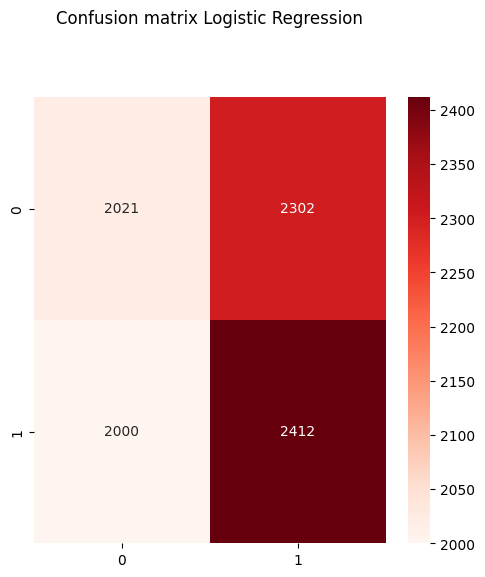

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

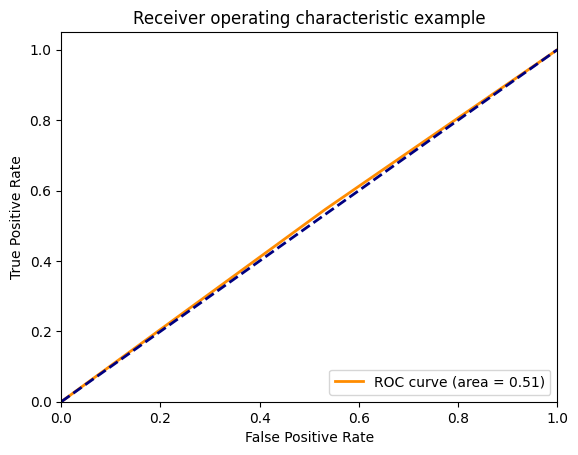

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_cut = X.iloc[:,:17]
X_cut

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.983542,0.000039,0.000000,0.000013,0.000820,0.122065,0.000039,0.000104,0.026111,0.000000,0.000013,0.056169,0.117273,0.012450,0.000000,0.000091
1,0.897556,0.000433,0.000011,0.000011,0.001089,0.437616,0.000089,0.000067,0.022391,0.000011,0.000000,0.040593,0.027070,0.001422,0.000011,0.000022
2,0.841594,0.000876,0.000000,0.000015,0.000287,0.520513,0.000091,0.000121,0.030530,0.000000,0.000000,0.044367,0.133720,0.002039,0.000015,0.000136
3,0.745210,0.001084,0.000000,0.000000,0.000138,0.644276,0.000231,0.000092,0.046397,0.000000,0.000023,0.015197,0.164672,0.008279,0.000000,0.000069
4,0.874320,0.000236,0.000012,0.000012,0.001117,0.472298,0.000037,0.000087,0.024704,0.000012,0.000000,0.104714,0.030154,0.003625,0.000012,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,0.902914,0.000672,0.000017,0.000017,0.001188,0.420178,0.000086,0.000069,0.034448,0.000017,0.000017,0.075062,0.036446,0.006700,0.000000,0.000086
17466,0.364232,0.000147,0.000012,0.000012,0.000733,0.930256,0.000061,0.000012,0.024539,0.000012,0.000000,0.032673,0.015976,0.005777,0.000000,0.000037
17467,0.898604,0.000675,0.000013,0.000013,0.000729,0.425705,0.000067,0.000094,0.027032,0.000013,0.000000,0.048085,0.090366,0.008732,0.000000,0.000040
17468,0.987780,0.000793,0.000015,0.000015,0.000945,0.065851,0.000107,0.000137,0.030426,0.000015,0.000015,0.125727,0.056461,0.005731,0.000000,0.000091


In [ ]:
X = X.iloc[:,0:17]
X

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.983542,0.000039,0.000000,0.000013,0.000820,0.122065,0.000039,0.000104,0.026111,0.000000,0.000013,0.056169,0.117273,0.012450,0.000000,0.000091
1,0.897556,0.000433,0.000011,0.000011,0.001089,0.437616,0.000089,0.000067,0.022391,0.000011,0.000000,0.040593,0.027070,0.001422,0.000011,0.000022
2,0.841594,0.000876,0.000000,0.000015,0.000287,0.520513,0.000091,0.000121,0.030530,0.000000,0.000000,0.044367,0.133720,0.002039,0.000015,0.000136
3,0.745210,0.001084,0.000000,0.000000,0.000138,0.644276,0.000231,0.000092,0.046397,0.000000,0.000023,0.015197,0.164672,0.008279,0.000000,0.000069
4,0.874320,0.000236,0.000012,0.000012,0.001117,0.472298,0.000037,0.000087,0.024704,0.000012,0.000000,0.104714,0.030154,0.003625,0.000012,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,0.902914,0.000672,0.000017,0.000017,0.001188,0.420178,0.000086,0.000069,0.034448,0.000017,0.000017,0.075062,0.036446,0.006700,0.000000,0.000086
17466,0.364232,0.000147,0.000012,0.000012,0.000733,0.930256,0.000061,0.000012,0.024539,0.000012,0.000000,0.032673,0.015976,0.005777,0.000000,0.000037
17467,0.898604,0.000675,0.000013,0.000013,0.000729,0.425705,0.000067,0.000094,0.027032,0.000013,0.000000,0.048085,0.090366,0.008732,0.000000,0.000040
17468,0.987780,0.000793,0.000015,0.000015,0.000945,0.065851,0.000107,0.000137,0.030426,0.000015,0.000015,0.125727,0.056461,0.005731,0.000000,0.000091


In [ ]:
X_cut = X.iloc[:, [0, 3]]
X_cut

,squareMeters,hasPool
0,0.983542,0.000013
1,0.897556,0.000011
2,0.841594,0.000015
3,0.745210,0.000000
4,0.874320,0.000012
...,...,...
17465,0.902914,0.000017
17466,0.364232,0.000012
17467,0.898604,0.000013
17468,0.987780,0.000015


In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую
yc_test

16960    1
16729    1
11871    1
12757    1
5827     1
        ..
1374     0
13335    1
12618    1
5996     0
14136    1
Name: category, Length: 8735, dtype: int64

In [ ]:
#настройка параметров модели
model = LogisticRegression()
yc_scor=model.fit(Xc_train, yc_train)
yc_score=yc_scor.predict(Xc_test)

In [ ]:
print(metrics.classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      4323
           1       0.51      0.26      0.34      4412

    accuracy                           0.50      8735
   macro avg       0.50      0.50      0.47      8735
weighted avg       0.50      0.50      0.47      8735



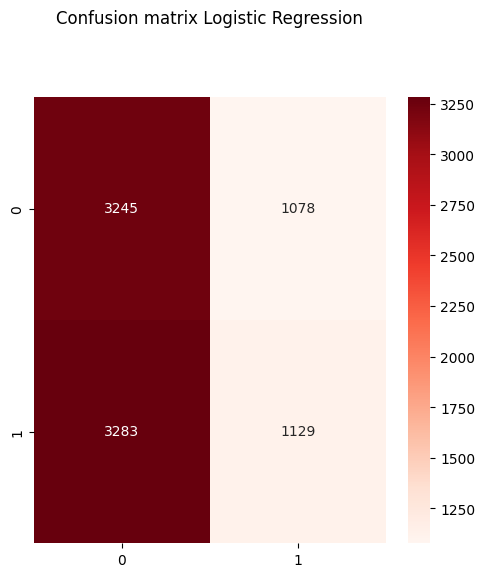

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

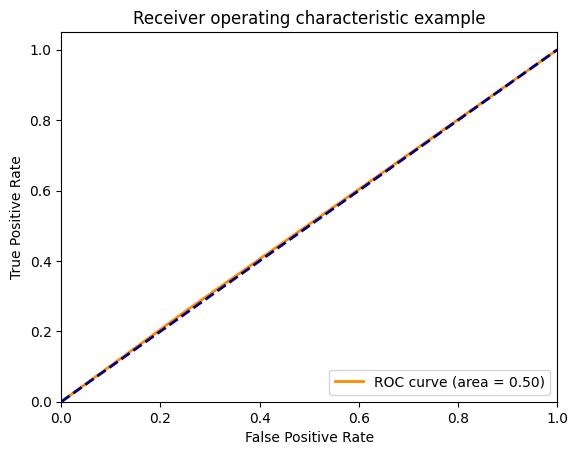

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()